In [1]:
### Basic NLP model for Capstone
# Import Libraries
import numpy as np
import pandas as pd
import nltk
import seaborn as sns # this was used for the correlation plot (length vs. review rating)
import matplotlib.pyplot as plt #basic plotting
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load in the Yelp data
data = pd.read_csv("yelp.csv")

In [3]:
### Examine data
print('shape of dataset:')
print(data.shape)
print('First few entries:')
print(data.head())

shape of dataset:
(10000, 10)
First few entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0    

<BarContainer object of 5 artists>

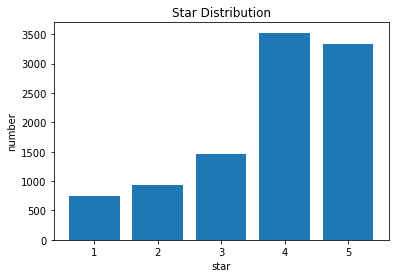

In [4]:
#count and sort
bar_graph = data['stars'].value_counts()
bar_graph = bar_graph.sort_index()
#plot
plt.title('Star Distribution')
plt.xlabel('star')
plt.ylabel('number')
plt.bar(bar_graph.index, bar_graph.values)

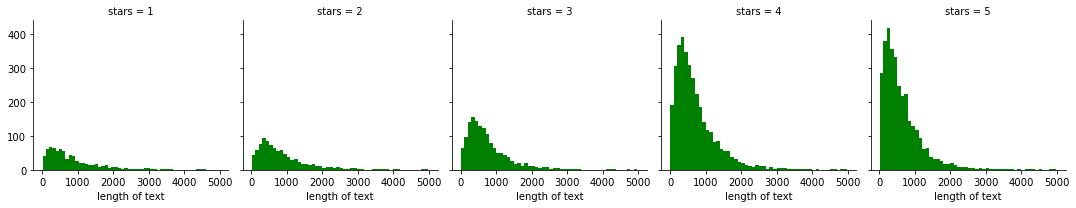

In [5]:
# correlation between length of review and rating may be insightful
data['length of text'] = data['text'].apply(len)
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length of text',bins=50,color='green')

In [6]:
# separate into binary varialbes
data["negative"] = np.where(data["stars"] <= 2, 1, 0)
#data_1 = data[["text","positive"]]
#print(data_1.head())
data["text_cleaned"] = data["text"].str.replace('[^\w\s]','')
data["text_cleaned2"] = data["text_cleaned"].str.lower()
x = data['text_cleaned2']
y = data['negative']

In [7]:
# removing stop words and punctuation
porter = PorterStemmer()
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return [porter.stem(word.lower()) for word in nopunc]

In [8]:
# words -> vectors
vocab = CountVectorizer(analyzer=text_process,min_df = 0.005).fit(x)
#vocab = CountVectorizer(stop_words = stopwords.words('english'), lowercase=True, ngram_range=(1, 3)).fit(x)
#print(vocab.vocabulary_)
print(vocab.get_feature_names()[1:330])

['10', '100', '11', '12', '13', '14', '15', '18', '2', '20', '24', '25', '3', '30', '35', '4', '40', '45', '5', '50', '6', '60', '7', '8', '80', '9', '90', 'abl', 'absolut', 'accept', 'access', 'accommod', 'accompani', 'across', 'act', 'activ', 'actual', 'ad', 'add', 'addict', 'addit', 'admit', 'ador', 'adult', 'advantag', 'adventur', 'advic', 'afford', 'afternoon', 'age', 'ago', 'agre', 'ahead', 'air', 'airport', 'alcohol', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also', 'altern', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'american', 'among', 'amount', 'anim', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'apart', 'apolog', 'app', 'appar', 'appeal', 'appear', 'appet', 'appl', 'appoint', 'appreci', 'approach', 'appropri', 'area', 'arent', 'arizona', 'around', 'arriv', 'art', 'artichok', 'asada', 'asian', 'asid', 'ask', 'ass', 'assum', 'asu', 'ate', 'atmospher', 'attempt', 'attend', 'attent', 'attitud', 'attract', 'auth

In [9]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (10000, 1633)
Non-Zero occurences:  454524
Density of the matrix =  2.7833680342927125


In [10]:
#from imblearn.over_sampling import SMOTE

# SMOTE the training data
#sm = SMOTE(random_state=6)
#X_bal, y_bal = sm.fit_resample(X_train1, y_train)
#y_bal.value_counts()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [12]:
# MN Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[2284  223]
 [ 170  323]]
Score: 86.9
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2507
           1       0.59      0.66      0.62       493

    accuracy                           0.87      3000
   macro avg       0.76      0.78      0.77      3000
weighted avg       0.87      0.87      0.87      3000



In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=6)
logreg.fit(x_train,y_train)
predlog = logreg.predict(x_test)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test,predlog))
print("Score:",round(accuracy_score(y_test,predlog)*100,2))
print("Classification Report:",classification_report(y_test,predlog))

Confusion Matrix for Logistic Regression:
[[2357  150]
 [ 216  277]]
Score: 87.8
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2507
           1       0.65      0.56      0.60       493

    accuracy                           0.88      3000
   macro avg       0.78      0.75      0.77      3000
weighted avg       0.87      0.88      0.87      3000



C:\Users\Steven Johannemann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[2481   26]
 [ 372  121]]
Score: 86.73
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2507
           1       0.82      0.25      0.38       493

    accuracy                           0.87      3000
   macro avg       0.85      0.62      0.65      3000
weighted avg       0.86      0.87      0.84      3000

